Load digits dataset from sklearn.

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
digits.data.shape

(1797, 64)

Plot 100 images from the digit dataset.

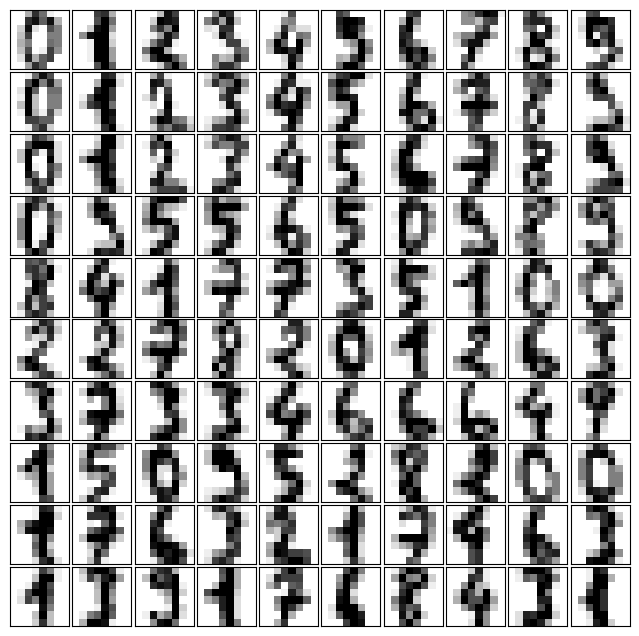

In [2]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

TODO - Reduce the data dimensionality with PCA, preserving 99% of the variance. Use whitening.



In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, whiten=True)
data_pca = pca.fit_transform(digits.data)

TODO - Try to fit the data to Gaussian mixture of 50, 60, 70, ..., and 200 components. Choose the optimal number of components based on AIC (Akaike Information Criterion).

In [4]:
from sklearn.mixture import GaussianMixture as GMM

n_components = np.arange(50, 210, 10)

aic_values = []

for n in n_components:
    gmm = GMM(n_components=n)
    gmm.fit(data_pca)
    aic_values.append(gmm.aic(data_pca))

# Find the optimal number of components based on AIC
best_n_components = n_components[np.argmin(aic_values)]
best_gmm = GMM(n_components=best_n_components)
best_gmm.fit(data_pca)

GaussianMixture(n_components=170)

Verify if the best model converged.

In [5]:
print(best_gmm.converged_)

True


TODO - Sample new data from the fitted model and generate digits with inverse PCA (inverse_transform function). Plot the generated digits.

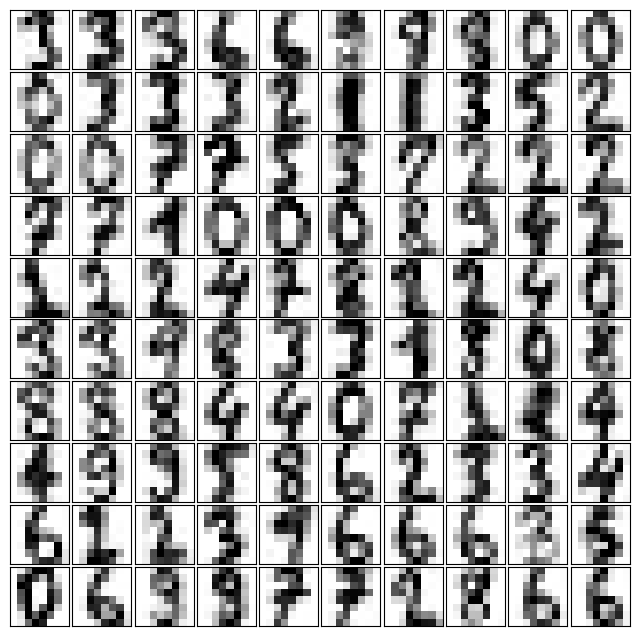

In [6]:
n_samples = 100
samples = best_gmm.sample(n_samples)[0]

# Generate digits with inverse PCA
digits_new = pca.inverse_transform(samples)

# Plot the generated digits
plot_digits(digits_new)
plt.show()